In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/credit-card-approval-clean-data/clean_dataset.csv")
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [3]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


# EDA
# 

In [5]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [6]:
df.describe(include='object')

,Industry,Ethnicity,Citizen
count,690,690,690
unique,14,5,3
top,Energy,White,ByBirth
freq,146,408,625


In [7]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

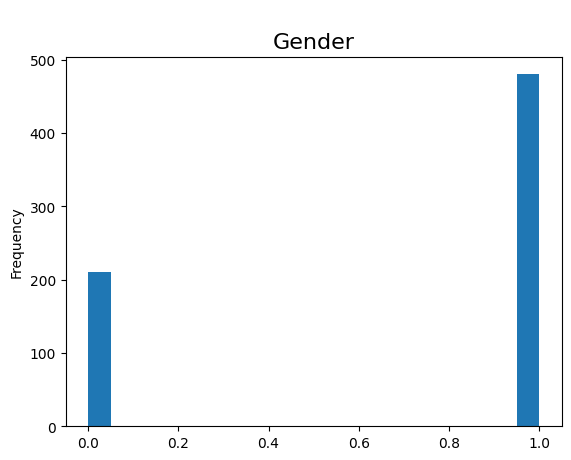

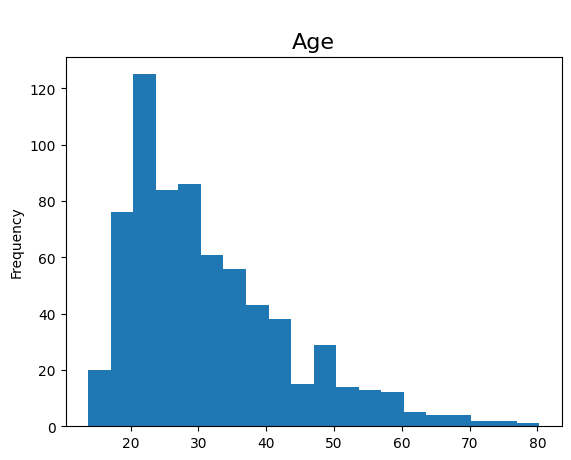

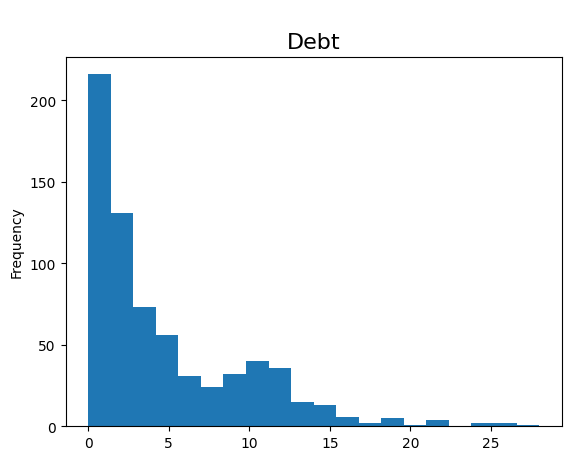

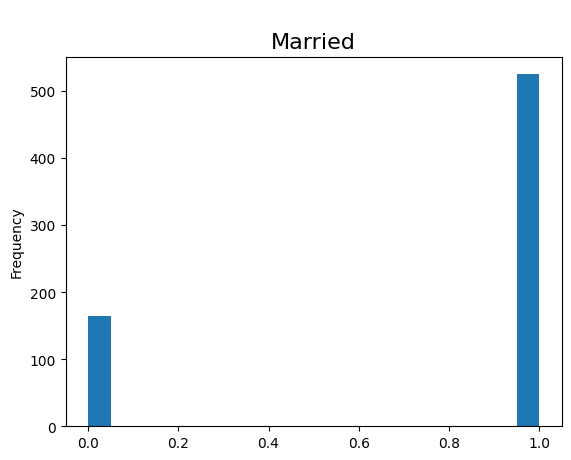

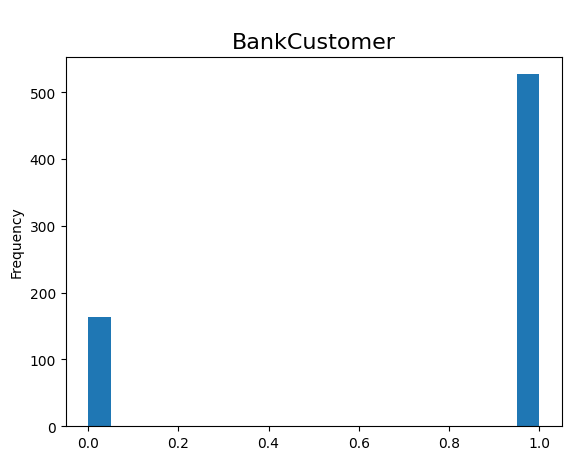

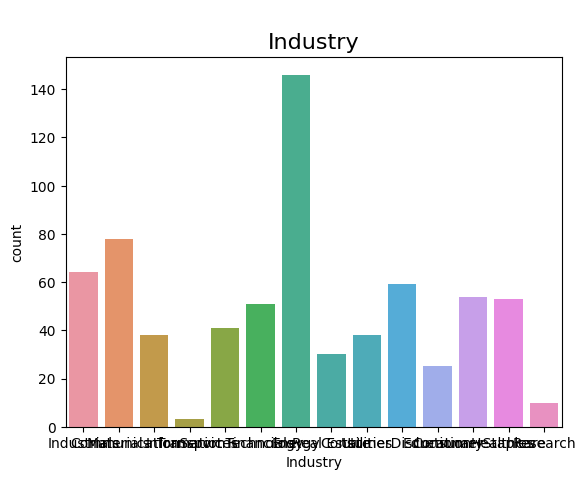

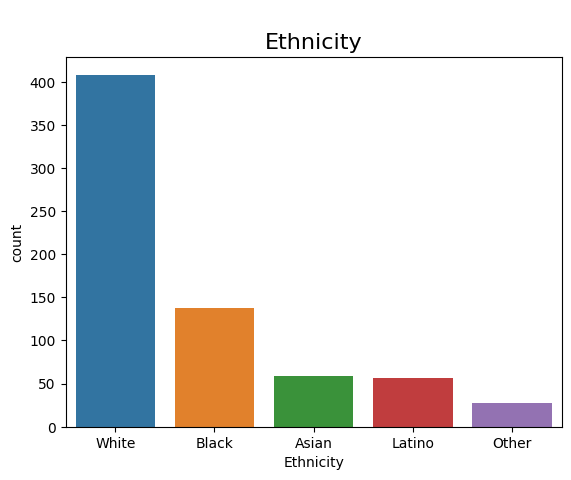

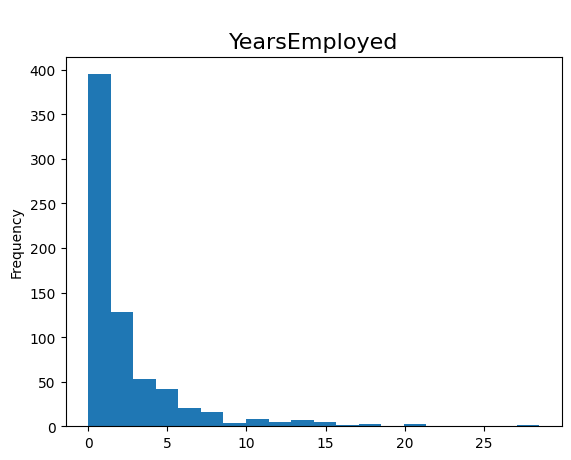

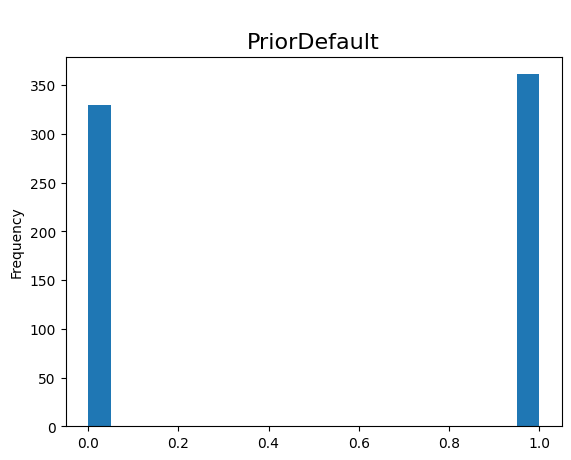

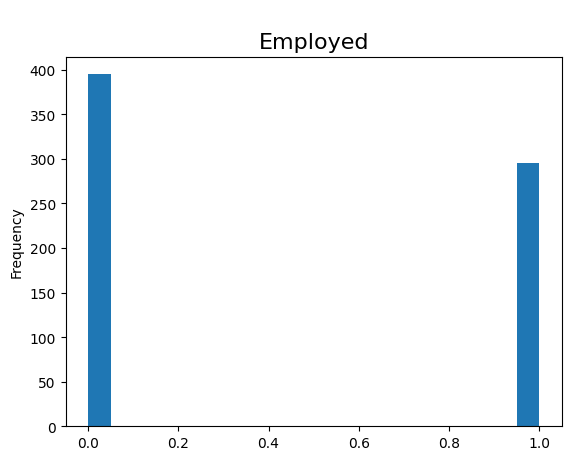

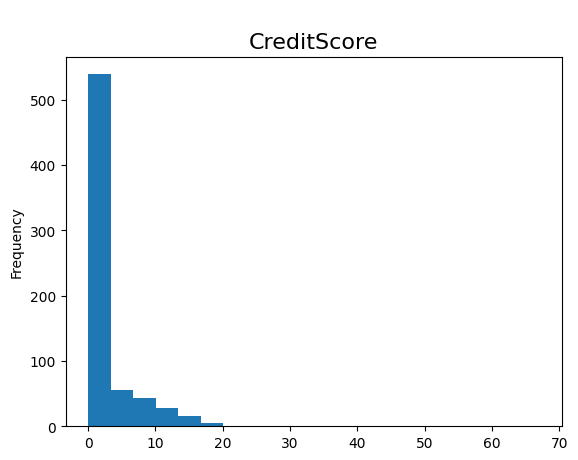

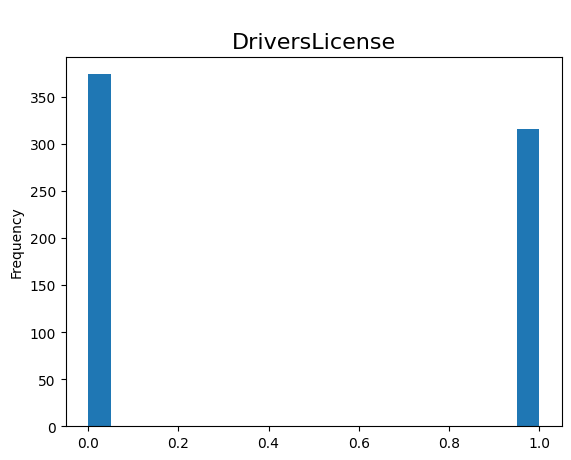

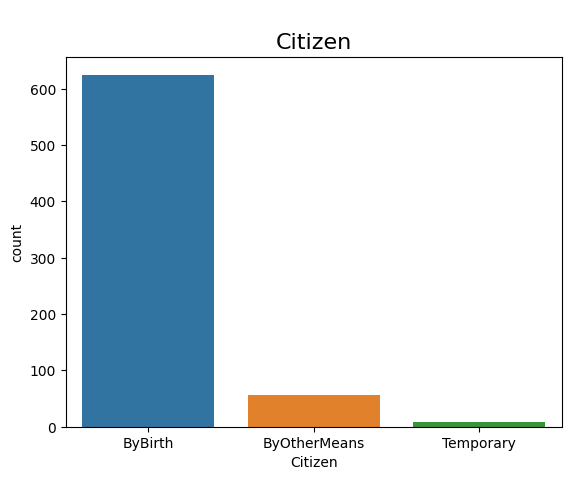

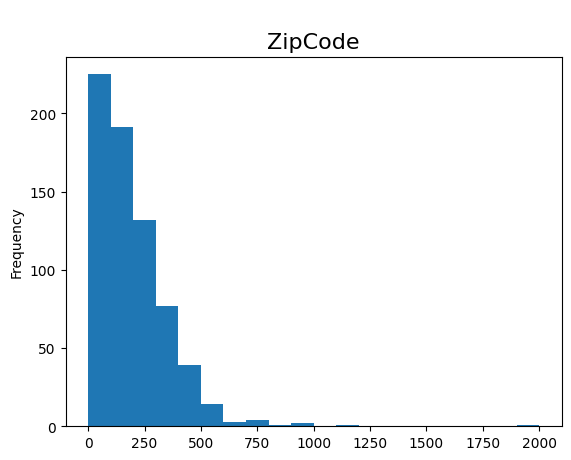

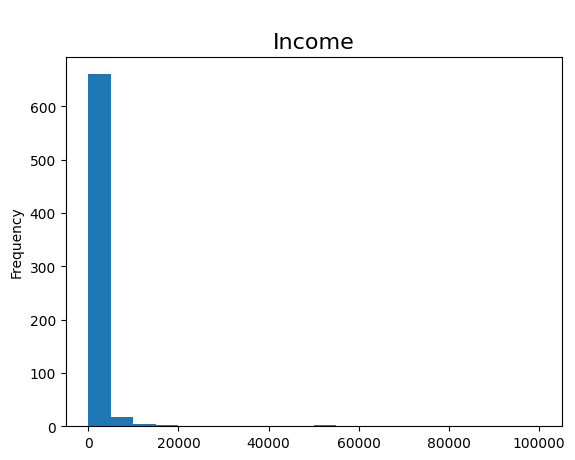

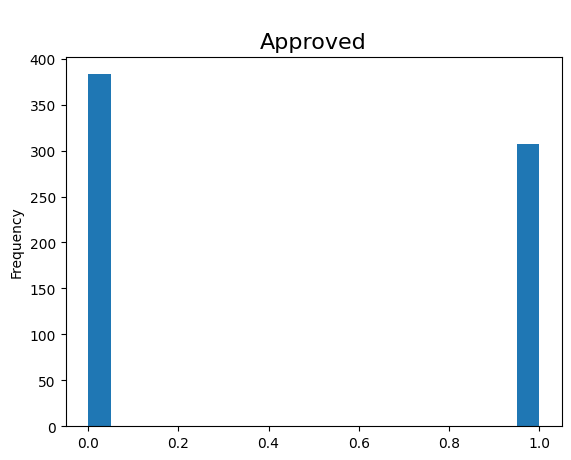

In [8]:
for feat in df.columns:
    if df[feat].dtype == 'object':
        sns.countplot(data=df , x= feat)
    else:
        df[feat].plot(kind='hist', bins = 20)
    plt.title('\n' + feat, fontsize=16)
    plt.show()

# Preprocessing

**handling outliers**
Outliers impact negative to our results

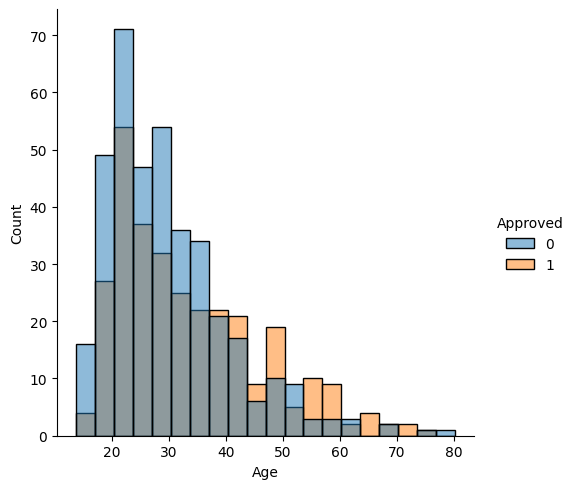

In [9]:
sns.displot(df,x='Age',hue='Approved')

In [10]:
df['Age'] = df['Age'].clip(upper=65)

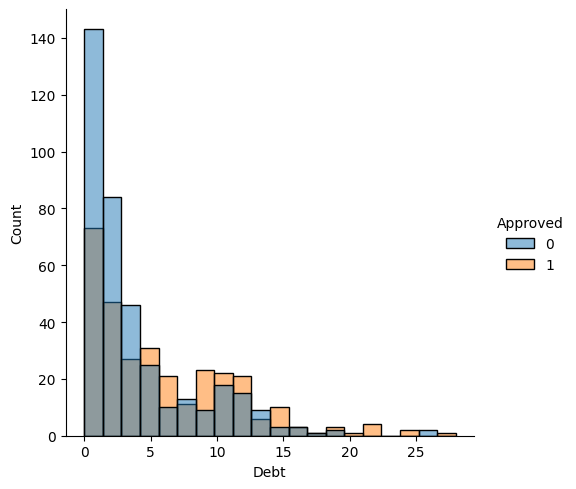

In [11]:
sns.displot(df,x='Debt',hue='Approved')

In [12]:
df['Debt'] = df['Debt'].clip(upper=15)

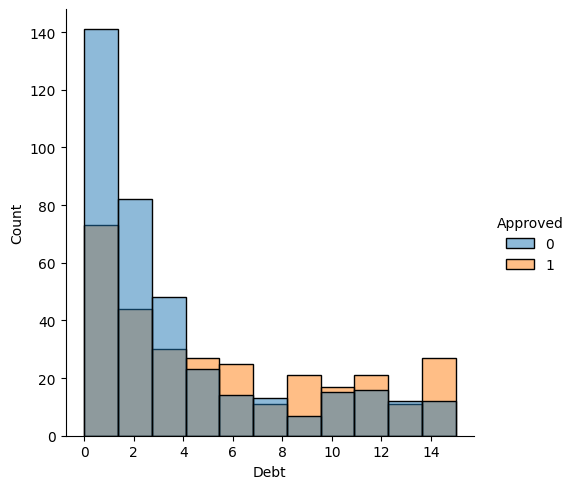

In [13]:
sns.displot(df,x='Debt',hue='Approved')

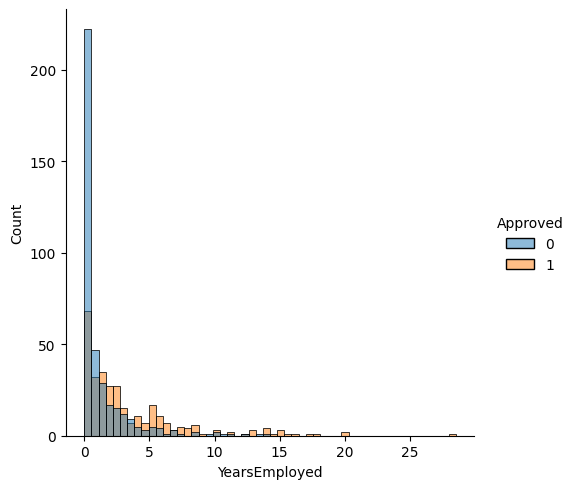

In [14]:
sns.displot(df,x='YearsEmployed',hue='Approved')

In [15]:
df['YearsEmployed']=df['YearsEmployed'].clip(upper=10)

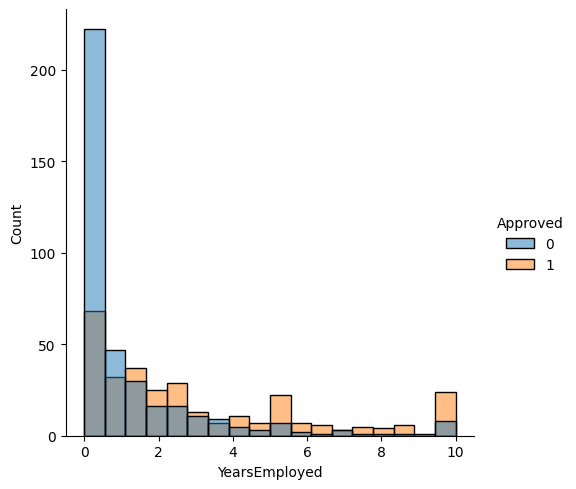

In [16]:
sns.displot(df,x='YearsEmployed',hue='Approved')

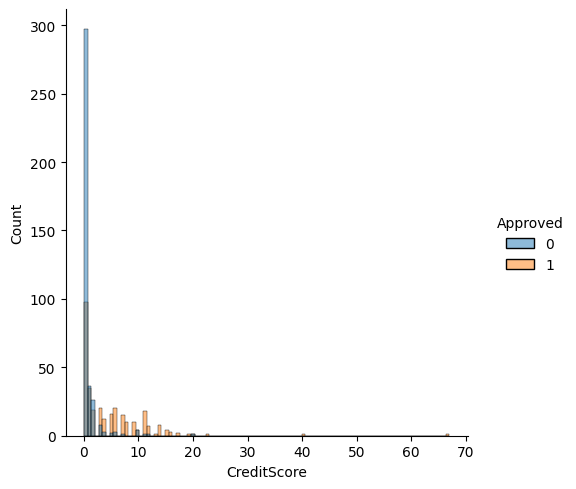

In [17]:
sns.displot(df,x='CreditScore',hue='Approved')

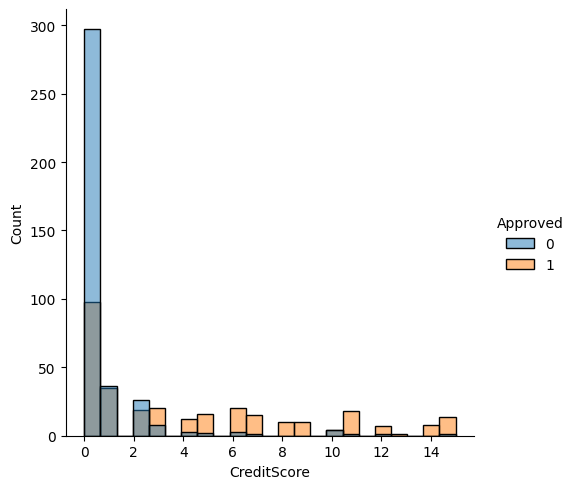

In [18]:
df['CreditScore'] = df['CreditScore'].clip(upper=15)
sns.displot(df,x='CreditScore',hue='Approved')

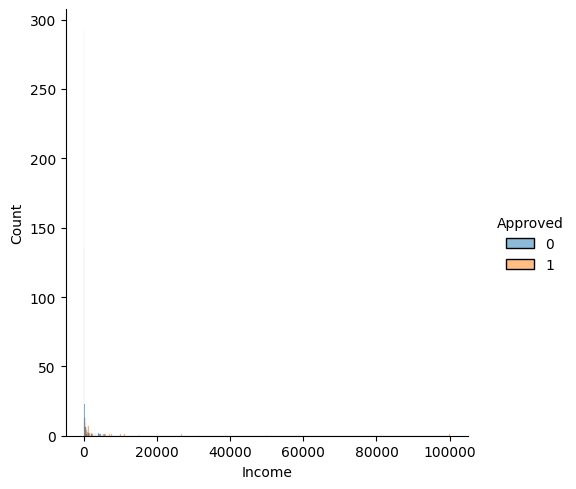

In [19]:
sns.displot(df,x='Income',hue='Approved')

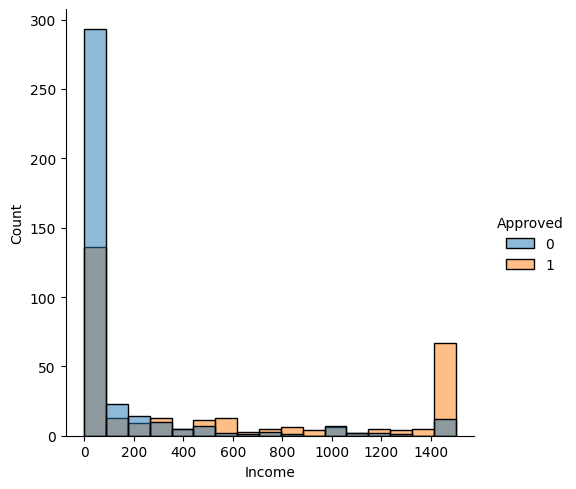

In [20]:
df['Income'] = df['Income'].clip(upper=1500)
sns.displot(df,x='Income',hue='Approved')

**Dummies**

In [21]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [22]:
cat_feat = ['Gender','Married','Citizen','Industry','Ethnicity']

In [23]:
df = pd.get_dummies(df,columns=cat_feat)

In [24]:
df.columns

Index(['Age', 'Debt', 'BankCustomer', 'YearsEmployed', 'PriorDefault',
       'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income',
       'Approved', 'Gender_0', 'Gender_1', 'Married_0', 'Married_1',
       'Citizen_ByBirth', 'Citizen_ByOtherMeans', 'Citizen_Temporary',
       'Industry_CommunicationServices', 'Industry_ConsumerDiscretionary',
       'Industry_ConsumerStaples', 'Industry_Education', 'Industry_Energy',
       'Industry_Financials', 'Industry_Healthcare', 'Industry_Industrials',
       'Industry_InformationTechnology', 'Industry_Materials',
       'Industry_Real Estate', 'Industry_Research', 'Industry_Transport',
       'Industry_Utilities', 'Ethnicity_Asian', 'Ethnicity_Black',
       'Ethnicity_Latino', 'Ethnicity_Other', 'Ethnicity_White'],
      dtype='object')

# Train Test Split

In [25]:
features = ['Age', 'Debt', 'BankCustomer', 'YearsEmployed', 'PriorDefault',
       'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income',
       'Approved', 'Gender_0', 'Gender_1', 'Married_0', 'Married_1',
       'Citizen_ByBirth', 'Citizen_ByOtherMeans', 'Citizen_Temporary',
       'Industry_CommunicationServices', 'Industry_ConsumerDiscretionary',
       'Industry_ConsumerStaples', 'Industry_Education', 'Industry_Energy',
       'Industry_Financials', 'Industry_Healthcare', 'Industry_Industrials',
       'Industry_InformationTechnology', 'Industry_Materials',
       'Industry_Real Estate', 'Industry_Research', 'Industry_Transport',
       'Industry_Utilities', 'Ethnicity_Asian', 'Ethnicity_Black',
       'Ethnicity_Latino', 'Ethnicity_Other', 'Ethnicity_White']

target = ['Approved']

In [26]:
x = df[features]
y = df[target]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3)

# Modeling

In [28]:
log = LogisticRegression().fit(x_train,y_train)

In [29]:
y_pred_train = log.predict(x_train)
y_pred_test = log.predict(x_test)

In [30]:
score_train = log.score(x_train,y_train)
score_test = log.score(x_test,y_test)

# Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
def confusion_matrix_plot(y, y_pred, dataset='Train'):
  cm = confusion_matrix( y, y_pred, labels=[0, 1])
  df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                columns = [i for i in ['Predicted - No','Predicted - Yes']])
  group_counts = ["{0:0.0f}".format(value) for value in
              cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                        cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize = (8,5))
  sns.heatmap(df_cm, annot=labels,fmt='', cmap='crest')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.title(f'{dataset} Confusion Matrix', fontsize=18)

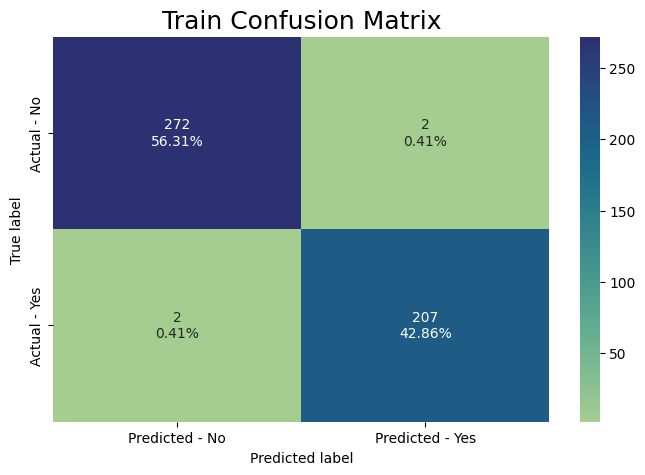

In [33]:
confusion_matrix_plot(y_train,y_pred_train)

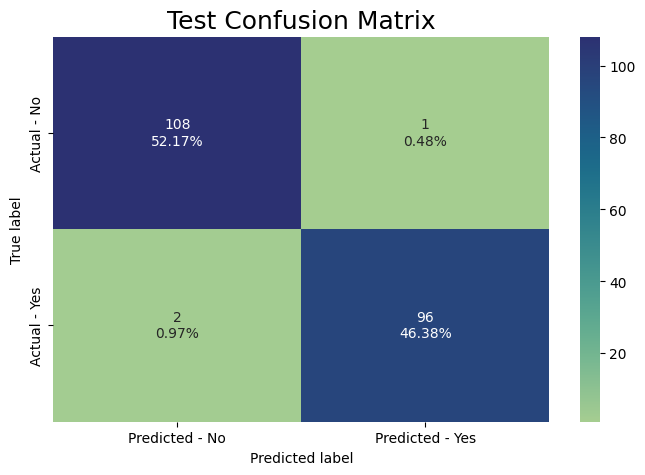

In [34]:
confusion_matrix_plot(y_test,y_pred_test, dataset='Test')

In [35]:
train_scores = [log.score(x_train[features],y_train)]
test_scores = [log.score(x_test[features],y_test)]
models = ['log']
score_dict = {
    'train_scores':train_scores,
    'test_scores':test_scores
}
pd.DataFrame(score_dict, index=models)


,train_scores,test_scores
log,0.991718,0.985507


# Error Analysis

In [36]:
x_train['y_pred_train'] = y_pred_train
x_train['y_train'] = y_train
x_test['y_pred_test'] = y_pred_test
x_test['y_test'] = y_test

In [37]:
x_train[(x_train['y_train']==0) & (x_train['y_pred_train']==1)].groupby(['y_train', 'y_pred_train']).mean()

,,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,...,Industry_Materials,Industry_Real Estate,Industry_Research,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White
y_train,y_pred_train,,,,,,,,,,,,,,,,,,,,,
0,1,20.585,6.75,1.0,1.0625,1.0,1.0,6.0,0.0,40.0,514.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
x_train.groupby(['y_pred_train']).mean()

,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,...,Industry_Real Estate,Industry_Research,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,y_train
y_pred_train,,,,,,,,,,,,,,,,,,,,,
0,29.760401,3.801077,0.704380,1.328248,0.200730,0.218978,0.576642,0.459854,198.536496,145.332117,...,0.054745,0.014599,0.003650,0.014599,0.087591,0.145985,0.124088,0.029197,0.613139,0.007299
1,33.079522,5.337225,0.851675,3.096100,0.942584,0.674641,4.258373,0.440191,146.339713,487.966507,...,0.023923,0.000000,0.004785,0.100478,0.076555,0.267943,0.019139,0.038278,0.598086,0.990431


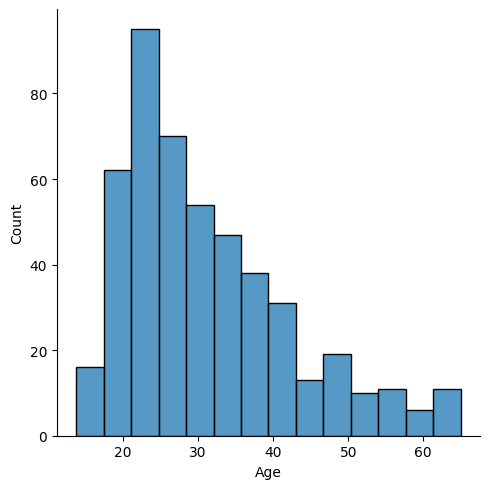

In [39]:
sns.displot(data=x_train['Age'])

Observations
* most pronunced difference is when age is higher 40 and above
* also much more of the errors we are concerned about had show prior defaults
* slightly more genders as 0



# ClassificationReport

In [40]:
from yellowbrick.classifier import ClassificationReport

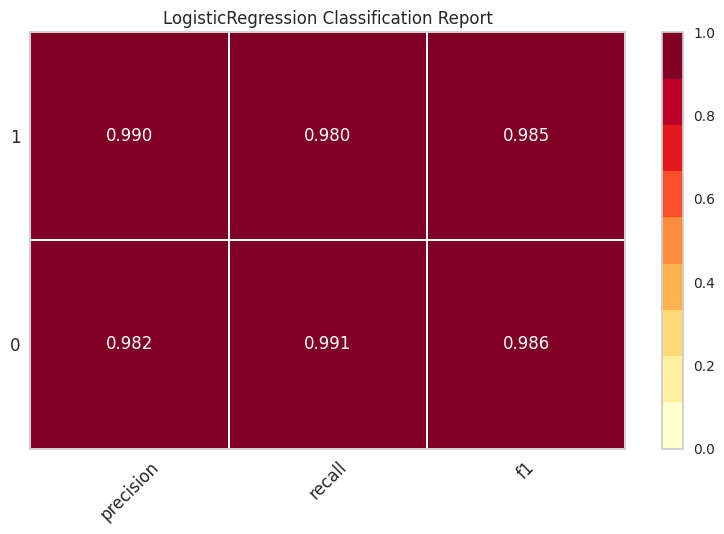

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [41]:
visualizer = ClassificationReport(log)
visualizer.fit(x_train[features], y_train)
visualizer.score(x_test[features], y_test)
visualizer.show()

# ROC Curve

In [42]:
from yellowbrick.classifier import ROCAUC

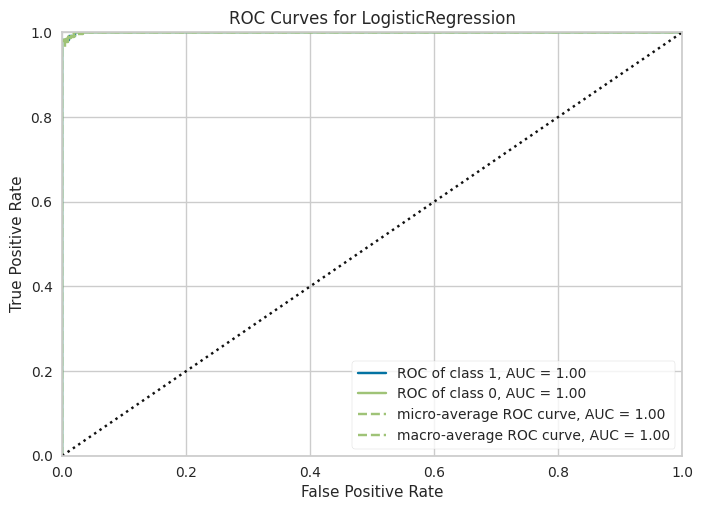

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [43]:
visualizer = ROCAUC(log, classes=[1,0])
visualizer.fit(x_train[features], y_train)
visualizer.score(x_test[features], y_test)
visualizer.show()

# PrecisionRecallCurve

In [44]:
from yellowbrick import classifier

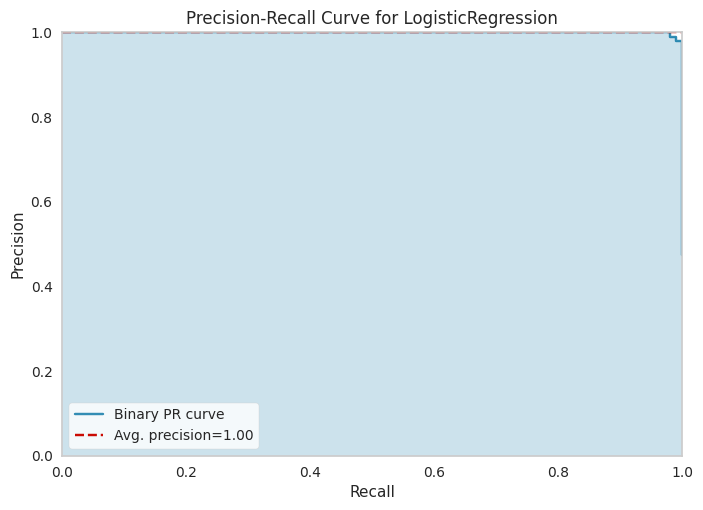

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [45]:
visualizer = classifier.PrecisionRecallCurve(log)
visualizer.fit(x_train[features], y_train)
visualizer.score(x_test[features], y_test)
visualizer.show()

# Descrimination Treshold

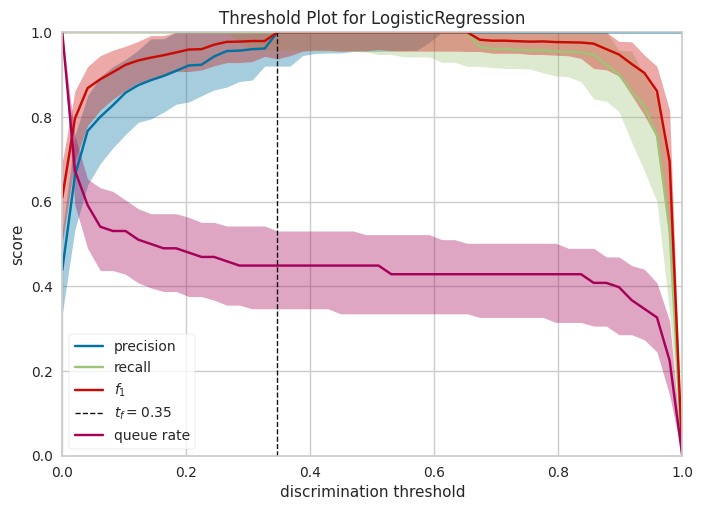

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [46]:
vis = classifier.DiscriminationThreshold(log, classes=[1,0])
vis.fit(x_train[features], y_train)
vis.score(x_test[features], y_test)
vis.show()